Lag en modell som predikerer tilsvarende NOT-operatoren.
Visualiser resultatet etter optimalisering av modellen.

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [26]:
x_train = torch.tensor([1.0, 0.0], dtype=torch.double).reshape(-1, 1)
y_train = torch.tensor([0.0, 1.0], dtype=torch.double).reshape(-1, 1) # opposite of x_train

In [27]:
class Model:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))
    
    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

In [40]:
model = Model()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(100000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

In [51]:
x_test = torch.arange(0.0, 1.0, 0.01, dtype=torch.double).reshape(-1, 1) #Skal teste modellen på disse dataene (0.0, 0.01, 0.02 ... 0.98, 0.99, 1.0)


No handles with labels found to put in legend.


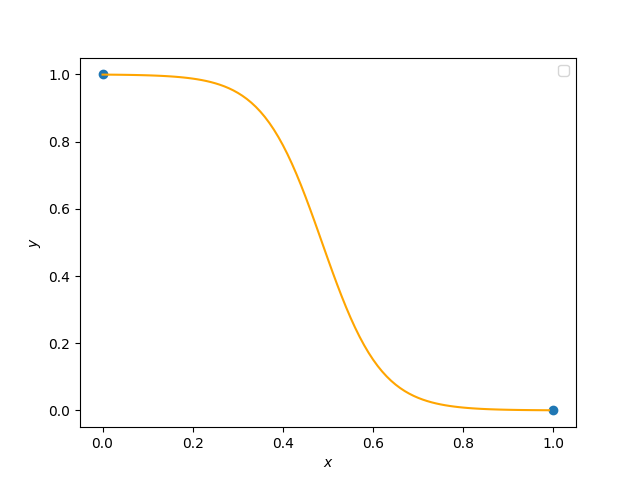

In [52]:
# Visualisering
%matplotlib widget

plt.scatter(x_train, y_train)

plt.xlabel("$x$")
plt.ylabel("$y$")


plt.plot(x_test, model.f(x_test).detach(), label="$f(x) = σ(xW+b)$", color="orange")

plt.legend()
plt.show()